 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment - 04 : Neural Networks </b>


This programming assignment gives you a chance to perform the classification task using neural networks. You will get to build a neural network from scratch and train and test it on a standard classification dataset. Further you will learn different tricks and techniques to train a neural network eficiently by observing few important issues and trying to overcome them. This includes observing the performance of the network for different activation functions and optimization algorithms. We will conclude with implementation of various regularization techniques to overcome the problems of overfitting and vanishing gradients.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.








  Part - (1) : Develop a neural network based classification network from scratch:  This programming assignment uses MNIST digit dataset. It consists of large collection of handwritten digits from 0 to 9. These images are formated as 28x28 pixel gray scale images. The objective of this programming assignment is to design a neural network architecture that takes input as 28x28 image (or 784 dimensional vector) as input and predicts the digit information in it. Although there are diffrent varieties of neural network architecture to solve this task, this programming assignment uses only the feed forward network.  

 1. Load MNIST data and create train, test splits

 - The MNIST dataset consists of around 70,000 images. Divide the dataset into two segments: training and testing. Allocate 60,000 images for training and 10,000 images for testing

 - Code for downloading the data and creating train-test splits is provided

 2. Design a simple classification network

 - Let us use three layer feed-forward neral network. Use 512 nodes in the hidden layers and 10 nodes in the output layer. The output $\textbf{y}$ from the input $\textbf{x}$ is computed as follows
  $ \textbf{y} = h(\textbf{W}_{3}g(\textbf{W}_{2}g(\textbf{W}_{1}\textbf{x}))) $
 where $\textbf{W}_{1} \in \mathcal{R}^{512 \times 768}$,$\textbf{W}_{2} \in \mathcal{R}^{512 \times 512}$,$\textbf{W}_{3} \in \mathcal{R}^{10 \times 512} $ are the parameters of the network. g(.) is the hidden layer activation function. h(.) is the output layer activation function   
 - Consider g(.) as ReLU activation function. Softmax activation function should be used at the last layer h(.), to get the posterior probability of the classes.

 - Training classification network:

  - Flatten the 28x28 images to arrive at 784 dimensional vector.    
 - Randomly initialize the parameters of network, $\textbf{W}_{1} \in \mathcal{R}^{768 \times 512}$,$\textbf{W}_{2} \in \mathcal{R}^{512 \times 512}$,$\textbf{W}_{3} \in \mathcal{R}^{512 \times 10}$  
 - Feedforward the batch of input vectors to get the posterior probability of classes.  
 - Compute the loss between the estimated posterior probabilities and the true targets.   
 - Update the parameters of network to minimize the loss function.  
  - Backpropagate the loss function to get the gradients.     

  - You can use stochastic gradient descent (SGD) optimization algorithm to update the parameters.     
  - Cleverly set the hyperparameters involved in this optimization process.  

 3. Evaluate the performance of classification network
 - feed-forward the MNIST data through the trained classification network to get class posteriors.   
 - Assign the input to the class having maximum posterior probability   
 - Compute the loss and accuaracy   
 - Report your observations   





In [ ]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
print("Flattened Testing data", x_test)
print("Testing labels", y_test)

Flattened Testing data [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Testing labels [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
##################################################
#Load MNIST data.
##################################################
import torchvision.datasets as datasets
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

#Training data
mnist_traindata = mnist_trainset.data.numpy()
mnist_trainlabel = mnist_trainset.targets.numpy()
print("Training data",mnist_traindata.shape)
print("Training labels",mnist_trainlabel.shape)

#Testing data
mnist_testdata = mnist_testset.data.numpy()
mnist_testlabel = mnist_testset.targets.numpy()
print("Testing data",mnist_testdata.shape)
print("Testing labels",mnist_testlabel.shape)

Training data (60000, 28, 28)
Training labels (60000,)
Testing data (10000, 28, 28)
Testing labels (10000,)


In [ ]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

print(mnist_traindata.shape,mnist_trainlabel.shape)
print(mnist_testdata.shape,mnist_testlabel.shape)

#print(mnist_traindata[0]/255.0)
#print(x_train[0])

a=mnist_traindata[0]/255.0
a=a.reshape(-1,28*28)
b=x_train[0]
print(a.shape)
print(b.shape)
print(a==b)


(60000, 784) (60000, 10)
(10000, 784) (10000, 10)
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
(1, 784)
(784,)
[[ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  T

In [ ]:
##################################################
#Load MNIST data.
##################################################
import torchvision.datasets as datasets
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

#Training data
mnist_traindata = mnist_trainset.data.numpy().reshape(-1, 28*28) / 255.0
mnist_trainlabel = mnist_trainset.targets.numpy()
print("Training data",mnist_traindata.shape)
print("Training labels",mnist_trainlabel.shape)

#Testing data
mnist_testdata = mnist_testset.data.numpy().reshape(-1, 28*28) / 255.0
mnist_testlabel = mnist_testset.targets.numpy()
print("Testing data",mnist_testdata.shape)
print("Testing labels",mnist_testlabel.shape)

##################################################
#Define the architecture
##################################################

#Complete the below function to impliment ReLU activation function
def ReLu(inp):
  outp = np.maximum(0, inp)

  return outp

#Complete the below function to impliment gradient of ReLU activation function
def gradReLu(inp):
  outp = np.zeros_like(inp)
  outp[inp > 0] = 1

  return outp

#Complete the below function to impliment softmax activation function
def softmax(inp):
  # inp = inp - np.max(inp, axis=1, keepdims=True)  # for numerical stability
  exp_inp = np.exp(inp)
  sum_exp_inp = np.sum(exp_inp, axis=1, keepdims=True)
  outp = exp_inp / sum_exp_inp

  return outp

#Complete the below function to impliment forward propagation of data
def fwdPropagate(inputs, weights):
  #Inputs: input data, paramters of network
  W1, b1, W2, b2, W3, b3 = weights

  #Compute the activations of first layer
  a1 = inputs @ W1 + b1
  z1 = ReLu(a1)
  #Compute the activations of second layer
  a2 = z1 @ W2 + b2
  z2 = ReLu(a2)
  #Compute the activations of third layer
  a3 = z2 @ W3 + b3
  z3 = softmax(a3)

  #the requires outputs, i.e., final output and intermediate activations
  outps = [z1, z2, z3]
  pre_act = [a1, a2, a3]

  #Return the requires outputs, i.e., final output and intermediate activations
  return outps, pre_act


#Complete the below function to compute the gradients
def computeGradients(inputs, targets, weights, pre_activations, activations):
  #Inputs: input data, targets, parameters of netwrok, intermediate activations

  W1, b1, W2, b2, W3, b3 = weights
  z1, z2, z3 = activations
  a1, a2, a3 = pre_activations

  #Compute the loss function for multi-class classification
  loss = -np.mean(np.sum(targets * np.log(z3 + 1e-10), axis=1))

  # Output layer
  dj_da3 = (z3 - targets) / inputs.shape[0]
  dj_dw3 = z2.T @ dj_da3
  dj_db3 = np.sum(dj_da3, axis=0)

  dj_da2 = (dj_da3 @ W3.T) * gradReLu(a2)
  dj_dw2 = z1.T @ dj_da2
  dj_db2 = np.sum(dj_da2, axis=0)

  dj_da1 = (dj_da2 @ W2.T) * gradReLu(a1)
  dj_dw1 = inputs.T @ dj_da1
  dj_db1 = np.sum(dj_da1, axis=0)

  #Return the gradients
  return [dj_dw1, dj_db1, dj_dw2, dj_db2, dj_dw3, dj_db3]

#Complete the below function to update the parameters using the above computed gradients
def applyGradients(weights, gradients, learning_rate):
  #Inputs: weights, gradients, and learning rate
  W1, b1, W2, b2, W3, b3 = weights
  dj_dw1, dj_db1, dj_dw2, dj_db2, dj_dw3, dj_db3 = gradients

  # update the weights using the gradients and learning rate
  W1 -= learning_rate * dj_dw1
  W2 -= learning_rate * dj_dw2
  W3 -= learning_rate * dj_dw3
  b1 -= learning_rate * dj_db1
  b2 -= learning_rate * dj_db2
  b3 -= learning_rate * dj_db3

  #Return the updated parameters
  return [W1, b1, W2, b2, W3, b3]

#Complete the below function to complete the backpropagation ste
def backPropagate(inputs, targets, weights, pre_act, activations, learning_rate):
  #Inputs: input data, targets, parameters of network, intermediate activations, learning rate of optimization algorithm

  #Compute the gradients
  gradients = computeGradients(inputs, targets, weights, pre_act, activations)

  #Update the paramters using gradients
  weights = applyGradients(weights, gradients, learning_rate)

  #Return the updated parameters
  return weights


##################################################
#Train the network
##################################################

#Complete the below function to complete the training of network
def training(inputs, targets_idx, batch_size = 128, epochs=30, train_val_split=0.9, learning_rate=0.01):

  #Set the hyperparameters
  hidden_units = 512
  n_features = 784
  n_classes = 10
  n_samples = inputs.shape[0]
  n_batches = int(n_samples / batch_size)

  #Split the training data into two parts.
  #Use 90 percent of training data for training the network.
  #Remaining 10 percent as validation data

  n_train = int(n_samples * train_val_split)
  n_val = n_samples - n_train
  inputs_train = inputs[:n_train]
  targets_train = targets_idx[:n_train].flatten()
  inputs_val = inputs[n_train:]
  targets_val = targets_idx[n_train:].flatten()

  # Ensure targets are one-hot encoded for training and validation
  targets_train = to_categorical(targets_train, num_classes=10)
  targets_val = to_categorical(targets_val, num_classes=10)

  #Randomly initialize the weights
  W1 = np.random.randn(n_features, hidden_units)  * np.sqrt(2. / n_features)
  W2 = np.random.randn(hidden_units, hidden_units) * np.sqrt(2. / n_features)
  W3 = np.random.randn(hidden_units, n_classes) * np.sqrt(2. / n_features)
  b1 = np.zeros(512)  # Layer 1 bias
  b2 = np.zeros(512)  # Layer 2 bias
  b3 = np.zeros(10)   # Output layer bias
  weights = [W1, b1, W2, b2, W3, b3]

  #Interate for epochs times
  for epoch in range(epochs):
    #Shuffle the training data
    indices = np.arange(n_train)
    np.random.shuffle(indices)
    inputs_train = inputs_train[indices]
    targets_train = targets_train[indices]

    #Interate through the batches of data
    for batch in range(n_batches):
      #Get the batch of data
      start = batch * batch_size
      end = start + batch_size
      inputs_batch = inputs_train[start:end]
      targets_batch = targets_train[start:end]

      #Forward propagation
      activations, pre_act = fwdPropagate(inputs_batch, weights)
      weights = backPropagate(inputs_batch, targets_batch, weights, pre_act, activations, learning_rate)

    #Compute outputs on training data
    activations_train, _ = fwdPropagate(inputs_train, weights)
    outputs_train = activations_train[-1]

    #Compute training accuracy, and training error
    train_accuracy = np.mean(np.argmax(outputs_train, axis=1) == np.argmax(targets_train, axis=1))
    train_error = -np.mean(np.sum(targets_train * np.log(outputs_train + 1e-10), axis=1))

    #Compute outputs on validation data
    activations_val, _ = fwdPropagate(inputs_val, weights)
    outputs_val = activations_val[-1]

    #Compute validation accuracy, and validation error
    val_accuracy = np.mean(np.argmax(outputs_val, axis=1) == np.argmax(targets_val, axis=1))
    val_error = np.mean(-np.sum(targets_val * np.log(outputs_val + 1e-10), axis=1))

    #Print the statistics of training, i.e., training error, training accuracy, validation error, and validation accuracy
    print(f"Epoch {epoch+1}/{epochs}, Batch {batch+1}/{n_batches}:")
    print(f"Train Accuracy: {train_accuracy:.4f}, Train Error: {train_error:.4f}")
    print(f"Validation Accuracy: {val_accuracy:.4f}, Validation Error: {val_error:.4f}")
    print("-" * 50)


    #return the parameters of network
  return weights


# flatten the input data to arrive at 784 dimensional vector

#Call the training function to train the network
est_weights = training(mnist_traindata, mnist_trainlabel, batch_size=128, epochs=30, train_val_split=0.9, learning_rate=0.001)



Training data (60000, 784)
Training labels (60000,)
Testing data (10000, 784)
Testing labels (10000,)


c:\Users\madha\Downloads\Python_venv\.venv\Lib\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\madha\Downloads\Python_venv\.venv\Lib\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Epoch 1/30, Batch 468/468:
Train Accuracy: 0.1161, Train Error: 2.2955
Validation Accuracy: 0.1072, Validation Error: 2.2958
--------------------------------------------------
Epoch 2/30, Batch 468/468:
Train Accuracy: 0.2285, Train Error: 2.2780
Validation Accuracy: 0.2217, Validation Error: 2.2782
--------------------------------------------------
Epoch 3/30, Batch 468/468:
Train Accuracy: 0.3201, Train Error: 2.1853
Validation Accuracy: 0.3208, Validation Error: 2.1843
--------------------------------------------------
Epoch 4/30, Batch 468/468:
Train Accuracy: 0.5206, Train Error: 1.7320
Validation Accuracy: 0.5304, Validation Error: 1.7259
--------------------------------------------------
Epoch 5/30, Batch 468/468:
Train Accuracy: 0.7141, Train Error: 1.0306
Validation Accuracy: 0.7335, Validation Error: 1.0072
--------------------------------------------------
Epoch 6/30, Batch 468/468:
Train Accuracy: 0.7869, Train Error: 0.7388
Validation Accuracy: 0.8042, Validation Error: 0.

In [ ]:
##################################################
#Evaluate the performance on test data
##################################################

predictions = []
for i in range(mnist_testdata.shape[0]):
  #Get the test data
  test_data = mnist_testdata[i].reshape(1, -1)
  #Forward propagation
  activations, _ = fwdPropagate(test_data, est_weights)
  #Get the output of network
  output = activations[-1]
  #Get the predicted label
  pred_label = np.argmax(output, axis=1)[0]
  predictions.append(pred_label)

# Compute the accuracy of the network on test data
accuracy = np.mean(np.array(predictions) == mnist_testlabel)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.9328


<b> Report your observations </b>

1. Training error and validation error decreases with number of epochs.

2. Training and validation accuracy increases with the number of epochs.

3. Changing the learning rate, or batch size, affects the training of the model.

4. The model was trained well, which is visible in the training and test accuracies.



<b> Part - (2) : Understanding activation functions: </b> In this part you will learn to use different activation functions for the classification task and compare their performances.

<dt> <h6> 1. Train MNIST digit classification network with different activation functions i.e. Sigmoid, Tanh, ReLU, LeakyReLU etc. You can stick to stochastic gradient descent optimization algorithm for this part </dt> </h6>
<dt> <h6> 2. Report the accuray on MNIST test data for all the experiments. Write down your observations in the report.</br> </dt> </h6>



In [ ]:
##################################################
#Train the network with different activation functions
##################################################

import torchvision.datasets as datasets
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

#Training data
mnist_traindata = mnist_trainset.data.numpy().reshape(-1, 28*28) / 255.0
mnist_trainlabel = mnist_trainset.targets.numpy()
print("Training data",mnist_traindata.shape)
print("Training labels",mnist_trainlabel.shape)

#Testing data
mnist_testdata = mnist_testset.data.numpy().reshape(-1, 28*28) / 255.0
mnist_testlabel = mnist_testset.targets.numpy()
print("Testing data",mnist_testdata.shape)
print("Testing labels",mnist_testlabel.shape)

#Complete the below function to impliment softmax activation function
def softmax(inp):
  # inp = inp - np.max(inp, axis=1, keepdims=True)  # for numerical stability
  exp_inp = np.exp(inp)
  sum_exp_inp = np.sum(exp_inp, axis=1, keepdims=True)
  outp = exp_inp / sum_exp_inp

  return outp

#Complete the below function to impliment ReLU activation function
def ReLu(inp):
  outp = np.maximum(0, inp)

  return outp

#Complete the below function to impliment gradient of ReLU activation function
def gradReLu(inp):
  outp = np.zeros_like(inp)
  outp[inp > 0] = 1

  return outp

# Complete the below function to impliment sigmoid activation function
def sigmoid(inp):
  outp = 1 / (1 + np.exp(-inp))

  return outp

def gradSigmoid(inp):
  outp = sigmoid(inp) * (1 - sigmoid(inp))

  return outp

# tanh activation function
def tanh(inp):
  outp = np.tanh(inp)

  return outp

def grad_tanh(inp):
    outp = 1 - np.tanh(inp)**2

    return outp

# leaky ReLU activation function
def leaky_relu(inp, alpha=0.01):
    outp = np.where(inp > 0, inp, alpha * inp)

    return outp

def grad_leaky_relu(inp, alpha=0.01):
    outp = np.where(inp > 0, 1, alpha)

    return outp

#Complete the below function to impliment forward propagation of data
def fwd_propagate(inputs, weights, activation_func='relu'):
  #Inputs: input data, paramters of network
    W1, b1, W2, b2, W3, b3 = weights

    #Compute the activations of first layer
    a1 = inputs @ W1 + b1
    if activation_func == 'relu':
        z1 = ReLu(a1)
    elif activation_func == 'sigmoid':
        z1 = sigmoid(a1)
    elif activation_func == 'tanh':
        z1 = tanh(a1)
    elif activation_func == 'leaky_relu':
        z1 = leaky_relu(a1)
    else:
        raise ValueError("Invalid activation function")

  # compute the activations of second layer
    a2 = z1 @ W2 + b2
    if activation_func == 'relu':
        z2 = ReLu(a2)
    elif activation_func == 'sigmoid':
        z2 = sigmoid(a2)
    elif activation_func == 'tanh':
        z2 = tanh(a2)
    elif activation_func == 'leaky_relu':
        z2 = leaky_relu(a2)
    else:
        raise ValueError("Invalid activation function")

    # compute the activations of third layer
    a3 = z2 @ W3 + b3
    z3 = softmax(a3)

    outps = [z1, z2, z3]
    pre_act = [a1, a2, a3]

  #Return the requires outputs, i.e., final output and intermediate activations
    return outps, pre_act

def compute_gradients(inputs, targets, weights, pre_activations, activations, activation_func='relu'):
    #Inputs: input data, targets, parameters of netwrok, intermediate activations

    W1, b1, W2, b2, W3, b3 = weights
    z1, z2, z3 = activations
    a1, a2, a3 = pre_activations

#Compute the loss function for multi-class classification
    loss = -np.mean(np.sum(targets * np.log(z3 + 1e-10), axis=1))

# Output layer
    dj_da3 = (z3 - targets) / inputs.shape[0]
    dj_dw3 = z2.T @ dj_da3

    dj_da2 = dj_da3 @ W3.T
    if activation_func == 'relu':
        dj_da2 *= gradReLu(a2)
    elif activation_func == 'sigmoid':
        dj_da2 *= gradSigmoid(a2)
    elif activation_func == 'tanh':
        dj_da2 *= grad_tanh(a2)
    elif activation_func == 'leaky_relu':
        dj_da2 *= grad_leaky_relu(a2)

    dj_dw2 = z1.T @ dj_da2

    dj_da1 = dj_da2 @ W2.T
    if activation_func == 'relu':
        dj_da1 *= gradReLu(a1)
    elif activation_func == 'sigmoid':
        dj_da1 *= gradSigmoid(a1)
    elif activation_func == 'tanh':
        dj_da1 *= grad_tanh(a1)
    elif activation_func == 'leaky_relu':
        dj_da1 *= grad_leaky_relu(a1)

    dj_dw1 = inputs.T @ dj_da1

    dj_db3 = np.sum(dj_da3, axis=0)  # For output layer
    dj_db2 = np.sum(dj_da2, axis=0)  # Hidden layer 2
    dj_db1 = np.sum(dj_da1, axis=0)

#Return the gradients
    return [dj_dw1, dj_db1, dj_dw2, dj_db2, dj_dw3, dj_db3]


def apply_gradients(weights, gradients, learning_rate):
    #Inputs: weights, gradients, and learning rate
    W1, b1, W2, b2, W3, b3 = weights
    dj_dw1, dj_db1, dj_dw2, dj_db2, dj_dw3, dj_db3 = gradients

    W1 -= learning_rate * dj_dw1
    W2 -= learning_rate * dj_dw2
    W3 -= learning_rate * dj_dw3
    b1 -= learning_rate * dj_db1
    b2 -= learning_rate * dj_db2
    b3 -= learning_rate * dj_db3

    return [W1, b1, W2, b2, W3, b3]

def back_propagate(inputs, targets, weights, pre_act, activations, learning_rate, activation_func='relu'):
    #Inputs: input data, targets, parameters of network, intermediate activations, learning rate of optimization algorithm

    #Compute the gradients
    gradients = compute_gradients(inputs, targets, weights, pre_act, activations, activation_func)

    #Update the paramters using gradients
    weights = apply_gradients(weights, gradients, learning_rate)

    #Return the updated parameters
    return weights


def training_diff(inputs, targets_idx, batch_size = 128, epochs=30, train_val_split=0.8, learning_rate=0.01, activation_func='relu'):
    #Set the hyperparameters
    hidden_units = 512
    n_features = 784
    n_classes = 10
    n_samples = inputs.shape[0]
    n_batches = int(n_samples / batch_size)

    #Split the training data into two parts.
    #Use 90 percent of training data for training the network.
    #Remaining 10 percent as validation data

    n_train = int(n_samples * train_val_split)
    n_val = n_samples - n_train
    inputs_train = inputs[:n_train]
    targets_train = targets_idx[:n_train].flatten()
    inputs_val = inputs[n_train:]
    targets_val = targets_idx[n_train:].flatten()

    # Ensure targets are one-hot encoded for training and validation
    targets_train = to_categorical(targets_train, num_classes=10)
    targets_val = to_categorical(targets_val, num_classes=10)

    #Randomly initialize the weights
    W1 = np.random.randn(n_features, hidden_units) * np.sqrt(2. / n_features)
    W2 = np.random.randn(hidden_units, hidden_units) * np.sqrt(2. / n_features)
    W3 = np.random.randn(hidden_units, n_classes) * np.sqrt(2. / n_features)
    b1 = np.zeros(512)  # Layer 1 bias
    b2 = np.zeros(512)  # Layer 2 bias
    b3 = np.zeros(10)   # Output layer bias
    weights = [W1, b1, W2, b2, W3, b3]
    print("Activation function:", activation_func)

    #Interate for epochs times
    for epoch in range(epochs):
    #Shuffle the training data
        indices = np.arange(n_train)
        np.random.shuffle(indices)
        inputs_train = inputs_train[indices]
        targets_train = targets_train[indices]

        #Interate through the batches of data
        for batch in range(n_batches):
            #Get the batch of data
            start = batch * batch_size
            end = start + batch_size
            inputs_batch = inputs_train[start:end]
            targets_batch = targets_train[start:end]

            #Forward propagation
            activations, pre_act = fwd_propagate(inputs_batch, weights, activation_func)
            weights = back_propagate(inputs_batch, targets_batch, weights, pre_act, activations, learning_rate, activation_func)

        #Compute outputs on training data
        activations_train, _ = fwd_propagate(inputs_train, weights, activation_func)
        outputs_train = activations_train[-1]

        #Compute training accuracy, and training error
        train_accuracy = np.mean(np.argmax(outputs_train, axis=1) == np.argmax(targets_train, axis=1))
        train_error = -np.mean(np.sum(targets_train * np.log(outputs_train + 1e-10), axis=1))

        #Compute outputs on validation data
        activations_val, _ = fwd_propagate(inputs_val, weights, activation_func)
        outputs_val = activations_val[-1]

        #Compute validation accuracy, and validation error
        val_accuracy = np.mean(np.argmax(outputs_val, axis=1) == np.argmax(targets_val, axis=1))
        val_error = -np.mean(np.sum(targets_train * np.log(outputs_train + 1e-10), axis=1))

        #Print the statistics of training, i.e., training error, training accuracy, validation error, and validation accuracy
        print(f"Epoch {epoch+1}/{epochs}, Batch {batch+1}/{n_batches}:")
        print(f"Train Accuracy: {train_accuracy:.4f}, Train Error: {train_error:.4f}")
        print(f"Validation Accuracy: {val_accuracy:.4f}, Validation Error: {val_error:.4f}")
        print("-" * 50)


    #return the parameters of network
    return weights

##################################################
#Evaluate the performance on MNIST test data
##################################################
act_func = ['relu', 'sigmoid', 'tanh', 'leaky_relu']

for func in act_func:
    est_weights = training_diff(mnist_traindata, mnist_trainlabel, batch_size=64, epochs=30, train_val_split=0.9, learning_rate=0.001, activation_func=func)

    #Compute the outputs on test data
    activations_test, _ = fwd_propagate(mnist_testdata, est_weights, func)
    outputs_test = activations_test[-1]

    #Compute the accuracy of the network on test data
    accuracy = np.mean(np.argmax(outputs_test, axis=1) == mnist_testlabel)
    print(f"Test Accuracy: {accuracy:.4f}")


Training data (60000, 784)
Training labels (60000,)
Testing data (10000, 784)
Testing labels (10000,)
Activation function: relu


c:\Users\madha\Downloads\Python_venv\.venv\Lib\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\madha\Downloads\Python_venv\.venv\Lib\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Epoch 1/30, Batch 234/234:
Train Accuracy: 0.1140, Train Error: 2.2992
Validation Accuracy: 0.1060, Validation Error: 2.2992
--------------------------------------------------
Epoch 2/30, Batch 234/234:
Train Accuracy: 0.1160, Train Error: 2.2949
Validation Accuracy: 0.1072, Validation Error: 2.2949
--------------------------------------------------
Epoch 3/30, Batch 234/234:
Train Accuracy: 0.1670, Train Error: 2.2881
Validation Accuracy: 0.1571, Validation Error: 2.2881
--------------------------------------------------
Epoch 4/30, Batch 234/234:
Train Accuracy: 0.2620, Train Error: 2.2751
Validation Accuracy: 0.2545, Validation Error: 2.2751
--------------------------------------------------
Epoch 5/30, Batch 234/234:
Train Accuracy: 0.3620, Train Error: 2.2448
Validation Accuracy: 0.3695, Validation Error: 2.2448
--------------------------------------------------
Epoch 6/30, Batch 234/234:
Train Accuracy: 0.3722, Train Error: 2.1637
Validation Accuracy: 0.3750, Validation Error: 2.

<b> Report your observations </b>

1. The accuracy of the network is very low for sigmoid activation function.

2. The accuracy of the network is high for tanh, leaky relu and relu activation functions.

3. The accuracies for tanh and leaky relu are almost same.

4. The performance of the actiation functions fluctuates every time I run the code, which means there is no clear cut best activation function, it all depends on the current data as well as weight initializations.



<b> Part - (3) : Understanding optimization algorithms: </b> In this part you will learn to use different optimiztion algorithm apart from SGD.

<dt> <h6> 1. Using the best activation function from Part - (2), train the classification network using Adam optimization algorithm. </dt> </h6>
<dt> <h6> 3. Compare the accuracy of the networks trained with SGD and Adam optimization algorithms. </dt> </h6>
<dt> <h6> 4. Report your observations. </dt> </h6>

In [ ]:
##################################################
#Train the network using Adam optimizer
##################################################

import torchvision.datasets as datasets
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

#Training data
mnist_traindata = mnist_trainset.data.numpy().reshape(-1, 28*28) / 255.0
mnist_trainlabel = mnist_trainset.targets.numpy()
print("Training data",mnist_traindata.shape)
print("Training labels",mnist_trainlabel.shape)

#Testing data
mnist_testdata = mnist_testset.data.numpy().reshape(-1, 28*28) / 255.0
mnist_testlabel = mnist_testset.targets.numpy()
print("Testing data",mnist_testdata.shape)
print("Testing labels",mnist_testlabel.shape)

#Complete the below function to impliment softmax activation function
def softmax(inp):
  # inp = inp - np.max(inp, axis=1, keepdims=True)  # for numerical stability
  exp_inp = np.exp(inp)
  sum_exp_inp = np.sum(exp_inp, axis=1, keepdims=True)
  outp = exp_inp / sum_exp_inp

  return outp

# tanh activation function
def tanh(inp):
  outp = np.tanh(inp)

  return outp

def grad_tanh(inp):
    outp = 1 - np.tanh(inp)**2

    return outp

#Complete the below function to impliment forward propagation of data
def fwd_prop_adam(inputs, weights):
  #Inputs: input data, paramters of network
    W1, b1, W2, b2, W3, b3 = weights

    #Compute the activations of first layer
    a1 = inputs @ W1 + b1
    z1 = tanh(a1)

  # compute the activations of second layer
    a2 = z1 @ W2 + b2
    z2 = tanh(a2)

    # compute the activations of third layer
    a3 = z2 @ W3 + b3
    z3 = softmax(a3)

    outps = [z1, z2, z3]
    pre_act = [a1, a2, a3]

  #Return the requires outputs, i.e., final output and intermediate activations
    return outps, pre_act

def compute_grad_adam(inputs, targets, weights, pre_activations, activations):
    #Inputs: input data, targets, parameters of netwrok, intermediate activations

    W1, b1, W2, b2, W3, b3 = weights
    z1, z2, z3 = activations
    a1, a2, a3 = pre_activations

#Compute the loss function for multi-class classification
    loss = -np.mean(np.sum(targets * np.log(z3 + 1e-10), axis=1))

# Output layer
    dj_da3 = (z3 - targets) / inputs.shape[0]
    dj_dw3 = z2.T @ dj_da3

    dj_da2 = dj_da3 @ W3.T
    dj_da2 *= grad_tanh(a2)

    dj_dw2 = z1.T @ dj_da2

    dj_da1 = dj_da2 @ W2.T
    dj_da1 *= grad_tanh(a1)

    dj_dw1 = inputs.T @ dj_da1

    dj_db3 = np.sum(dj_da3, axis=0)  # For output layer
    dj_db2 = np.sum(dj_da2, axis=0)  # Hidden layer 2
    dj_db1 = np.sum(dj_da1, axis=0)

#Return the gradients
    return [dj_dw1, dj_db1, dj_dw2, dj_db2, dj_dw3, dj_db3]


# use adam optimizer to update the weights
def adam_optimizer(weights, gradients, learning_rate, beta1=0.9, beta2=0.999, epsilon=1e-8):
    # Initialize the first and second moment vectors
    m = [np.zeros_like(w) for w in weights]
    v = [np.zeros_like(w) for w in weights]

    # Update the moment vectors
    for i in range(len(weights)):
        m[i] = beta1 * m[i] + (1 - beta1) * gradients[i]
        v[i] = beta2 * v[i] + (1 - beta2) * (gradients[i] ** 2)

        # Compute bias-corrected moment estimates
        m_hat = m[i] / (1 - beta1)
        v_hat = v[i] / (1 - beta2)

        # Update the weights
        weights[i] -= learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)

    return weights

def back_prop_adam(inputs, targets, weights, pre_act, activations, learning_rate):
    #Inputs: input data, targets, parameters of network, intermediate activations, learning rate of optimization algorithm

    #Compute the gradients
    gradients = compute_grad_adam(inputs, targets, weights, pre_act, activations)

    #Update the paramters using gradients
    weights = adam_optimizer(weights, gradients, learning_rate)

    #Return the updated parameters
    return weights


def training_adam(inputs, targets_idx, batch_size = 128, epochs=30, train_val_split=0.8, learning_rate=0.01):
    #Set the hyperparameters
    hidden_units = 512
    n_features = 784
    n_classes = 10
    n_samples = inputs.shape[0]
    n_batches = int(n_samples / batch_size)

    #Split the training data into two parts.
    #Use 90 percent of training data for training the network.
    #Remaining 10 percent as validation data

    n_train = int(n_samples * train_val_split)
    n_val = n_samples - n_train
    inputs_train = inputs[:n_train]
    targets_train = targets_idx[:n_train].flatten()
    inputs_val = inputs[n_train:]
    targets_val = targets_idx[n_train:].flatten()

    # Ensure targets are one-hot encoded for training and validation
    targets_train = to_categorical(targets_train, num_classes=10)
    targets_val = to_categorical(targets_val, num_classes=10)

    #Randomly initialize the weights
    W1 = np.random.randn(n_features, hidden_units) * np.sqrt(2. / n_features)
    W2 = np.random.randn(hidden_units, hidden_units) * np.sqrt(2. / n_features)
    W3 = np.random.randn(hidden_units, n_classes) * np.sqrt(2. / n_features)
    b1 = np.zeros(512)  # Layer 1 bias
    b2 = np.zeros(512)  # Layer 2 bias
    b3 = np.zeros(10)   # Output layer bias
    weights = [W1, b1, W2, b2, W3, b3]

    #Interate for epochs times
    for epoch in range(epochs):
    #Shuffle the training data
        indices = np.arange(n_train)
        np.random.shuffle(indices)
        inputs_train = inputs_train[indices]
        targets_train = targets_train[indices]

        #Interate through the batches of data
        for batch in range(n_batches):
            #Get the batch of data
            start = batch * batch_size
            end = start + batch_size
            inputs_batch = inputs_train[start:end]
            targets_batch = targets_train[start:end]

            #Forward propagation
            activations, pre_act = fwd_prop_adam(inputs_batch, weights)
            weights = back_prop_adam(inputs_batch, targets_batch, weights, pre_act, activations, learning_rate)

        #Compute outputs on training data
        activations_train, _ = fwd_prop_adam(inputs_train, weights)
        outputs_train = activations_train[-1]

        #Compute training accuracy, and training error
        train_accuracy = np.mean(np.argmax(outputs_train, axis=1) == np.argmax(targets_train, axis=1))
        train_error = -np.mean(np.sum(targets_train * np.log(outputs_train + 1e-10), axis=1))

        #Compute outputs on validation data
        activations_val, _ = fwd_prop_adam(inputs_val, weights)
        outputs_val = activations_val[-1]

        #Compute validation accuracy, and validation error
        val_accuracy = np.mean(np.argmax(outputs_val, axis=1) == np.argmax(targets_val, axis=1))
        val_error = -np.mean(np.sum(targets_train * np.log(outputs_train + 1e-10), axis=1))

        #Print the statistics of training, i.e., training error, training accuracy, validation error, and validation accuracy
        print(f"Epoch {epoch+1}/{epochs}, Batch {batch+1}/{n_batches}:")
        print(f"Train Accuracy: {train_accuracy:.4f}, Train Error: {train_error:.4f}")
        print(f"Validation Accuracy: {val_accuracy:.4f}, Validation Error: {val_error:.4f}")
        print("-" * 50)


    #return the parameters of network
    return weights

##################################################
#Compare the accuracies and report your observations
##################################################

# train adam
est_weights = training_adam(mnist_traindata, mnist_trainlabel, batch_size=128, epochs=30, train_val_split=0.9, learning_rate=0.001)





Training data (60000, 784)
Training labels (60000,)
Testing data (10000, 784)
Testing labels (10000,)
Epoch 1/30, Batch 234/234:
Train Accuracy: 0.8446, Train Error: 0.5402
Validation Accuracy: 0.8468, Validation Error: 0.5402
--------------------------------------------------
Epoch 2/30, Batch 234/234:
Train Accuracy: 0.9002, Train Error: 0.3878
Validation Accuracy: 0.9047, Validation Error: 0.3878
--------------------------------------------------
Epoch 3/30, Batch 234/234:
Train Accuracy: 0.9254, Train Error: 0.2927
Validation Accuracy: 0.9239, Validation Error: 0.2927
--------------------------------------------------
Epoch 4/30, Batch 234/234:
Train Accuracy: 0.9479, Train Error: 0.2089
Validation Accuracy: 0.9407, Validation Error: 0.2089
--------------------------------------------------
Epoch 5/30, Batch 234/234:
Train Accuracy: 0.9505, Train Error: 0.2173
Validation Accuracy: 0.9410, Validation Error: 0.2173
--------------------------------------------------
Epoch 6/30, Batch 

In [ ]:
# test adam
activations_test, _ = fwd_prop_adam(mnist_testdata, est_weights)
outputs_test = activations_test[-1]
accuracy = np.mean(np.argmax(outputs_test, axis=1) == mnist_testlabel)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.9669


<b> Report your observations </b>

1. I ran the previous cell multiple times and picked the activation function that consistently performed better than rest, although not by much, and hence the choice of tanh().

2. It is evidently visible that the Adam optimizer does a better job than the SGD. The train error is much lower with Adam optimizer than with SGD.

3. We also see that the test accuracy is high, which indicates the high train accuracy is not because of overfitting to the data.



<b> Part - (4) : Understanding regularization methods: </b> In this part of the assignment, you will learn about a few regularization techniques to reduce the overfitting problem. Using the above built network, include the following techniques to reduce the overfitting by retraining the network efficiently. Write down the accuracies for each case.
<dt> <h6> 1. Weight regularization: Add regularization term to the classification los </dt> </h6>
<dt> <h6> 2. Dropout with a probability of 0.2: Randomly drop the activation potentials of hidden neural with 0.2 probability. Disable the dropout layer in inference model. You can experiment with different dropout probabilities and report your observations.  </dt> </h6>
<dt> <h6> 3. Early stopping: Stop the network training when it is started to overfitting to training data. </dt> </h6>


In [ ]:
##################################################
#Training with weight regularization
##################################################
import torchvision.datasets as datasets
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

#Training data
mnist_traindata = mnist_trainset.data.numpy().reshape(-1, 28*28) / 255.0
mnist_trainlabel = mnist_trainset.targets.numpy()
print("Training data",mnist_traindata.shape)
print("Training labels",mnist_trainlabel.shape)

#Testing data
mnist_testdata = mnist_testset.data.numpy().reshape(-1, 28*28) / 255.0
mnist_testlabel = mnist_testset.targets.numpy()
print("Testing data",mnist_testdata.shape)
print("Testing labels",mnist_testlabel.shape)


#Complete the below function to impliment softmax activation function
def softmax(inp):
  # inp = inp - np.max(inp, axis=1, keepdims=True)  # for numerical stability
  exp_inp = np.exp(inp)
  sum_exp_inp = np.sum(exp_inp, axis=1, keepdims=True)
  outp = exp_inp / sum_exp_inp

  return outp

# tanh activation function
def tanh(inp):
  outp = np.tanh(inp)

  return outp

def grad_tanh(inp):
    outp = 1 - np.tanh(inp)**2

    return outp

#Complete the below function to impliment forward propagation of data
def fwd_prop_adam(inputs, weights):
  #Inputs: input data, paramters of network
    W1, b1, W2, b2, W3, b3 = weights

    #Compute the activations of first layer
    a1 = inputs @ W1 + b1
    z1 = tanh(a1)

  # compute the activations of second layer
    a2 = z1 @ W2 + b2
    z2 = tanh(a2)

    # compute the activations of third layer
    a3 = z2 @ W3 + b3
    z3 = softmax(a3)

    outps = [z1, z2, z3]
    pre_act = [a1, a2, a3]

  #Return the requires outputs, i.e., final output and intermediate activations
    return outps, pre_act

# use adam optimizer to update the weights
def adam_optimizer(weights, gradients, learning_rate, beta1=0.9, beta2=0.999, epsilon=1e-8):
    # Initialize the first and second moment vectors
    m = [np.zeros_like(w) for w in weights]
    v = [np.zeros_like(w) for w in weights]

    # Update the moment vectors
    for i in range(len(weights)):
        m[i] = beta1 * m[i] + (1 - beta1) * gradients[i]
        v[i] = beta2 * v[i] + (1 - beta2) * (gradients[i] ** 2)

        # Compute bias-corrected moment estimates
        m_hat = m[i] / (1 - beta1)
        v_hat = v[i] / (1 - beta2)

        # Update the weights
        weights[i] -= learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)

    return weights


# modified compute_grad_adam with L2 regularization
def compute_grad_adam_reg(inputs, targets, weights, pre_activations, activations, lambda_reg=0.001):
    W1, b1, W2, b2, W3, b3 = weights
    z1, z2, z3 = activations
    a1, a2, a3 = pre_activations

    loss = -np.mean(np.sum(targets * np.log(z3 + 1e-10), axis=1))
    reg_loss = 0.5 * lambda_reg * (np.sum(W1**2) + np.sum(W2**2) + np.sum(W3**2))
    loss += reg_loss

    dj_da3 = (z3 - targets) / inputs.shape[0]
    dj_dw3 = z2.T @ dj_da3 + lambda_reg * W3  # Added regularization term

    dj_da2 = dj_da3 @ W3.T * grad_tanh(a2)
    dj_dw2 = z1.T @ dj_da2 + lambda_reg * W2  # Added regularization term

    dj_da1 = dj_da2 @ W2.T * grad_tanh(a1)
    dj_dw1 = inputs.T @ dj_da1 + lambda_reg * W1  # Added regularization term

    dj_db3 = np.sum(dj_da3, axis=0)  # For output layer
    dj_db2 = np.sum(dj_da2, axis=0)  # Hidden layer 2
    dj_db1 = np.sum(dj_da1, axis=0)

    return [dj_dw1, dj_db1, dj_dw2, dj_db2, dj_dw3, dj_db3]

def back_prop_adam_reg(inputs, targets, weights, pre_act, activations, learning_rate, lambda_reg=0.001):
    gradients = compute_grad_adam_reg(inputs, targets, weights, pre_act, activations, lambda_reg)
    weights = adam_optimizer(weights, gradients, learning_rate)
    return weights

def training_adam_reg(inputs, targets_idx, batch_size=128, epochs=30, train_val_split=0.8, learning_rate=0.01, lambda_reg=1e-5):
    #Set the hyperparameters
    hidden_units = 512
    n_features = 784
    n_classes = 10
    n_samples = inputs.shape[0]
    n_batches = int(n_samples / batch_size)

    #Split the training data into two parts.
    #Use 90 percent of training data for training the network.
    #Remaining 10 percent as validation data

    n_train = int(n_samples * train_val_split)
    n_val = n_samples - n_train
    inputs_train = inputs[:n_train]
    targets_train = targets_idx[:n_train].flatten()
    inputs_val = inputs[n_train:]
    targets_val = targets_idx[n_train:].flatten()

    # Ensure targets are one-hot encoded for training and validation
    targets_train = to_categorical(targets_train, num_classes=10)
    targets_val = to_categorical(targets_val, num_classes=10)

    #Randomly initialize the weights
    W1 = np.random.randn(n_features, hidden_units) * np.sqrt(2. / n_features)
    W2 = np.random.randn(hidden_units, hidden_units) * np.sqrt(2. / n_features)
    W3 = np.random.randn(hidden_units, n_classes) * np.sqrt(2. / n_features)
    b1 = np.zeros(512)  # Layer 1 bias
    b2 = np.zeros(512)  # Layer 2 bias
    b3 = np.zeros(10)   # Output layer bias
    weights = [W1, b1, W2, b2, W3, b3]

    #Interate for epochs times
    for epoch in range(epochs):
        #Shuffle the training data
        indices = np.arange(n_train)
        np.random.shuffle(indices)
        inputs_train = inputs_train[indices]
        targets_train = targets_train[indices]

        #Interate through the batches of data
        for batch in range(n_batches):
            #Get the batch of data
            start = batch * batch_size
            end = start + batch_size
            inputs_batch = inputs_train[start:end]
            targets_batch = targets_train[start:end]

            #Forward propagation
            activations, pre_act = fwd_prop_adam(inputs_batch, weights)
            weights = back_prop_adam_reg(inputs_batch, targets_batch, weights, pre_act, activations, learning_rate, lambda_reg)

        #Compute outputs on training data
        activations_train, _ = fwd_prop_adam(inputs_train, weights)
        outputs_train = activations_train[-1]

        #Compute training accuracy, and training error
        train_accuracy = np.mean(np.argmax(outputs_train, axis=1) == np.argmax(targets_train, axis=1))
        train_error = -np.mean(np.sum(targets_train * np.log(outputs_train + 1e-10), axis=1))

        #Compute outputs on validation data
        activations_val, _ = fwd_prop_adam(inputs_val, weights)
        outputs_val = activations_val[-1]

        #Compute validation accuracy, and validation error
        val_accuracy = np.mean(np.argmax(outputs_val, axis=1) == np.argmax(targets_val, axis=1))
        val_error = -np.mean(np.sum(targets_train * np.log(outputs_train + 1e-10), axis=1))

        #Print the statistics of training, i.e., training error, training accuracy, validation error, and validation accuracy
        print(f"Epoch {epoch+1}/{epochs}, Batch {batch+1}/{n_batches}:")
        print(f"Train Accuracy: {train_accuracy:.4f}, Train Error: {train_error:.4f}")
        print(f"Validation Accuracy: {val_accuracy:.4f}, Validation Error: {val_error:.4f}")
        print("-" * 50)

    return weights




##################################################
#Training with dropout strategy
##################################################

def dropout_forward(x, dropout_prob=0.2, training=True):
    if training:
        mask = (np.random.rand(*x.shape) > dropout_prob) / (1.0 - dropout_prob)
        return x * mask, mask
    return x, None

def dropout_backward(dout, mask):
    return dout * mask

# Modified forward propagation with dropout
def fwd_prop_adam_dropout(inputs, weights, dropout_prob=0.2, training=True):
    W1, b1, W2, b2, W3, b3 = weights
    a1 = inputs @ W1 + b1
    z1 = tanh(a1)
    z1, mask1 = dropout_forward(z1, dropout_prob, training)

    a2 = z1 @ W2 + b2
    z2 = tanh(a2)
    z2, mask2 = dropout_forward(z2, dropout_prob, training)

    a3 = z2 @ W3 + b3
    z3 = softmax(a3)

    return [z1, z2, z3], [a1, a2, a3], [mask1, mask2]

# Modified backprop with dropout masks
def compute_grad_adam_dropout(inputs, targets, weights, pre_activations, activations, masks, lambda_reg=0.0):
    W1, b1, W2, b2, W3, b3 = weights
    z1, z2, z3 = activations
    a1, a2, a3 = pre_activations
    mask1, mask2 = masks

    loss = -np.mean(np.sum(targets * np.log(z3 + 1e-10), axis=1))
    reg_loss = 0.5 * lambda_reg * (np.sum(W1**2) + np.sum(W2**2) + np.sum(W3**2))
    loss += reg_loss

    dj_da3 = (z3 - targets) / inputs.shape[0]
    dj_dw3 = z2.T @ dj_da3 + lambda_reg * W3

    dj_da2 = dj_da3 @ W3.T * grad_tanh(a2)
    dj_da2 = dropout_backward(dj_da2, mask2)  # Apply dropout mask
    dj_dw2 = z1.T @ dj_da2 + lambda_reg * W2

    dj_da1 = dj_da2 @ W2.T * grad_tanh(a1)
    dj_da1 = dropout_backward(dj_da1, mask1)  # Apply dropout mask
    dj_dw1 = inputs.T @ dj_da1 + lambda_reg * W1

    dj_db3 = np.sum(dj_da3, axis=0)
    dj_db2 = np.sum(dj_da2, axis=0)
    dj_db1 = np.sum(dj_da1, axis=0)

    return [dj_dw1, dj_db1, dj_dw2, dj_db2, dj_dw3, dj_db3]

# define backpropagation with weight reg and dropout
def back_prop_adam_dropout(inputs, targets, weights, pre_act, activations, masks, learning_rate, lambda_reg=0.0):
    gradients = compute_grad_adam_dropout(inputs, targets, weights, pre_act, activations, masks, lambda_reg)
    weights = adam_optimizer(weights, gradients, learning_rate)
    return weights

def training_adam_dropout(inputs, targets_idx, batch_size=128, epochs=30, train_val_split=0.8, learning_rate=0.01, dropout_prob=0.2):
    #Set the hyperparameters
    hidden_units = 512
    n_features = 784
    n_classes = 10
    n_samples = inputs.shape[0]
    n_batches = int(n_samples / batch_size)

    #Split the training data into two parts.
    #Use 90 percent of training data for training the network.
    #Remaining 10 percent as validation data

    n_train = int(n_samples * train_val_split)
    n_val = n_samples - n_train
    inputs_train = inputs[:n_train]
    targets_train = targets_idx[:n_train].flatten()
    inputs_val = inputs[n_train:]
    targets_val = targets_idx[n_train:].flatten()

    # Ensure targets are one-hot encoded for training and validation
    targets_train = to_categorical(targets_train, num_classes=10)
    targets_val = to_categorical(targets_val, num_classes=10)

    #Randomly initialize the weights
    W1 = np.random.randn(n_features, hidden_units) * np.sqrt(2. / n_features)
    W2 = np.random.randn(hidden_units, hidden_units) * np.sqrt(2. / n_features)
    W3 = np.random.randn(hidden_units, n_classes) * np.sqrt(2. / n_features)
    b1 = np.zeros(512)  # Layer 1 bias
    b2 = np.zeros(512)  # Layer 2 bias
    b3 = np.zeros(10)   # Output layer bias
    weights = [W1, b1, W2, b2, W3, b3]

    #Interate for epochs times
    for epoch in range(epochs):
        #Shuffle the training data
        indices = np.arange(n_train)
        np.random.shuffle(indices)
        inputs_train = inputs_train[indices]
        targets_train = targets_train[indices]

        #Interate through the batches of data
        for batch in range(n_batches):
            #Get the batch of data
            start = batch * batch_size
            end = start + batch_size
            inputs_batch = inputs_train[start:end]
            targets_batch = targets_train[start:end]

            #Forward propagation with dropout
            activations, pre_act, masks = fwd_prop_adam_dropout(inputs_batch, weights, dropout_prob, training=True)
            weights = back_prop_adam_dropout(inputs_batch, targets_batch, weights, pre_act, activations, masks, learning_rate)

        #Compute outputs on training data
        activations_train, _, _ = fwd_prop_adam_dropout(inputs_train, weights, dropout_prob, training=False)
        outputs_train = activations_train[-1]

        #Compute training accuracy, and training error
        train_accuracy = np.mean(np.argmax(outputs_train, axis=1) == np.argmax(targets_train, axis=1))
        train_error = -np.mean(np.sum(targets_train * np.log(outputs_train + 1e-10), axis=1))

        #Compute outputs on validation data
        activations_val, _, _ = fwd_prop_adam_dropout(inputs_val, weights, dropout_prob, training=False)
        outputs_val = activations_val[-1]

        #Compute validation accuracy, and validation error
        val_accuracy = np.mean(np.argmax(outputs_val, axis=1) == np.argmax(targets_val, axis=1))
        val_error = -np.mean(np.sum(targets_train * np.log(outputs_train + 1e-10), axis=1))

        #Print the statistics of training, i.e., training error, training accuracy, validation error, and validation accuracy
        print(f"Epoch {epoch+1}/{epochs}, Batch {batch+1}/{n_batches}:")
        print(f"Train Accuracy: {train_accuracy:.4f}, Train Error: {train_error:.4f}")
        print(f"Validation Accuracy: {val_accuracy:.4f}, Validation Error: {val_error:.4f}")
        print("-" * 50)

    return weights


##################################################
#Training with early stopping criterion
##################################################

def training_early_stopping(inputs, targets_idx, batch_size=128, epochs=30, train_val_split=0.8, learning_rate=0.01, patience=5):
    #Set the hyperparameters
    hidden_units = 512
    n_features = 784
    n_classes = 10
    n_samples = inputs.shape[0]
    n_batches = int(n_samples / batch_size)

    #Split the training data into two parts.
    #Use 90 percent of training data for training the network.
    #Remaining 10 percent as validation data

    n_train = int(n_samples * train_val_split)
    n_val = n_samples - n_train
    inputs_train = inputs[:n_train]
    targets_train = targets_idx[:n_train].flatten()
    inputs_val = inputs[n_train:]
    targets_val = targets_idx[n_train:].flatten()

    # Ensure targets are one-hot encoded for training and validation
    targets_train = to_categorical(targets_train, num_classes=10)
    targets_val = to_categorical(targets_val, num_classes=10)

    #Randomly initialize the weights
    W1 = np.random.randn(n_features, hidden_units) * np.sqrt(2. / n_features)
    W2 = np.random.randn(hidden_units, hidden_units) * np.sqrt(2. / n_features)
    W3 = np.random.randn(hidden_units, n_classes) * np.sqrt(2. / n_features)
    b1 = np.zeros(512)  # Layer 1 bias
    b2 = np.zeros(512)  # Layer 2 bias
    b3 = np.zeros(10)   # Output layer bias
    weights = [W1, b1, W2, b2, W3, b3]

    best_val_loss = float('inf')
    patience_counter = 0
    best_weights = weights.copy()

    #Interate for epochs times
    for epoch in range(epochs):
        #Shuffle the training data
        indices = np.arange(n_train)
        np.random.shuffle(indices)
        inputs_train = inputs_train[indices]
        targets_train = targets_train[indices]

        #Interate through the batches of data
        for batch in range(n_batches):
            #Get the batch of data
            start = batch * batch_size
            end = start + batch_size
            inputs_batch = inputs_train[start:end]
            targets_batch = targets_train[start:end]

            #Forward propagation
            activations, pre_act = fwd_prop_adam(inputs_batch, weights)
            weights = back_prop_adam(inputs_batch, targets_batch, weights, pre_act, activations, learning_rate)

        #Compute outputs on training data
        activations_train, _ = fwd_prop_adam(inputs_train, weights)
        outputs_train = activations_train[-1]

        #Compute training accuracy, and training error
        train_accuracy = np.mean(np.argmax(outputs_train, axis=1) == np.argmax(targets_train, axis=1))
        train_error = -np.mean(np.sum(targets_train * np.log(outputs_train + 1e-10), axis=1))

        #Compute outputs on validation data
        activations_val, _ = fwd_prop_adam(inputs_val, weights)
        outputs_val = activations_val[-1]

        #Compute validation accuracy, and validation error
        val_accuracy = np.mean(np.argmax(outputs_val, axis=1) == np.argmax(targets_val, axis=1))
        val_error = -np.mean(np.sum(targets_train * np.log(outputs_train + 1e-10), axis=1))

        if val_error < best_val_loss:
            best_val_loss = val_error
            patience_counter = 0
            best_weights = weights.copy()
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f"Early stopping at epoch {epoch+1}")
                break

        #Print the statistics of training, i.e., training error, training accuracy, validation error, and validation accuracy
        print(f"Epoch {epoch+1}/{epochs}, Batch {batch+1}/{n_batches}:")
        print(f"Train Accuracy: {train_accuracy:.4f}, Train Error: {train_error:.4f}")
        print(f"Validation Accuracy: {val_accuracy:.4f}, Validation Error: {val_error:.4f}")
        print("-" * 50)

    return best_weights

est_weights_reg = training_adam_reg(mnist_traindata, mnist_trainlabel, batch_size=128, epochs=30, train_val_split=0.9, learning_rate=0.001, lambda_reg=1e-7)
est_weights_dropout = training_adam_dropout(mnist_traindata, mnist_trainlabel, batch_size=128, epochs=30, train_val_split=0.9, learning_rate=0.001, dropout_prob=0.3)
est_weights_early_stopping = training_early_stopping(mnist_traindata, mnist_trainlabel, batch_size=128, epochs=30, train_val_split=0.9, learning_rate=0.001, patience=5)

# get the test accuracy for each model
activations_test_reg, _ = fwd_prop_adam(mnist_testdata, est_weights_reg)
outputs_test_reg = activations_test_reg[-1]
accuracy_reg = np.mean(np.argmax(outputs_test_reg, axis=1) == mnist_testlabel)
print(f"Test Accuracy with L2 Regularization: {accuracy_reg:.4f}")

activations_test_dropout, _, _ = fwd_prop_adam_dropout(mnist_testdata, est_weights_dropout, dropout_prob=0.2, training=False)
outputs_test_dropout = activations_test_dropout[-1]
accuracy_dropout = np.mean(np.argmax(outputs_test_dropout, axis=1) == mnist_testlabel)
print(f"Test Accuracy with Dropout: {accuracy_dropout:.4f}")

activations_test_early_stopping, _ = fwd_prop_adam(mnist_testdata, est_weights_early_stopping)
outputs_test_early_stopping = activations_test_early_stopping[-1]
accuracy_early_stopping = np.mean(np.argmax(outputs_test_early_stopping, axis=1) == mnist_testlabel)
print(f"Test Accuracy with Early Stopping: {accuracy_early_stopping:.4f}")




Training data (60000, 784)
Training labels (60000,)
Testing data (10000, 784)
Testing labels (10000,)


c:\Users\madha\Downloads\Python_venv\.venv\Lib\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\madha\Downloads\Python_venv\.venv\Lib\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Epoch 1/30, Batch 468/468:
Train Accuracy: 0.9425, Train Error: 0.2368
Validation Accuracy: 0.9530, Validation Error: 0.2368
--------------------------------------------------
Epoch 2/30, Batch 468/468:
Train Accuracy: 0.9587, Train Error: 0.1725
Validation Accuracy: 0.9607, Validation Error: 0.1725
--------------------------------------------------
Epoch 3/30, Batch 468/468:
Train Accuracy: 0.9666, Train Error: 0.1429
Validation Accuracy: 0.9668, Validation Error: 0.1429
--------------------------------------------------
Epoch 4/30, Batch 468/468:
Train Accuracy: 0.9653, Train Error: 0.1442
Validation Accuracy: 0.9660, Validation Error: 0.1442
--------------------------------------------------
Epoch 5/30, Batch 468/468:
Train Accuracy: 0.9703, Train Error: 0.1195
Validation Accuracy: 0.9692, Validation Error: 0.1195
--------------------------------------------------
Epoch 6/30, Batch 468/468:
Train Accuracy: 0.9722, Train Error: 0.1106
Validation Accuracy: 0.9688, Validation Error: 0.

In [ ]:
activations_test_dropout, _, _ = fwd_prop_adam_dropout(mnist_testdata, est_weights_dropout, dropout_prob=0.2, training=False)
outputs_test_dropout = activations_test_dropout[-1]
accuracy_dropout = np.mean(np.argmax(outputs_test_dropout, axis=1) == mnist_testlabel)
print(f"Test Accuracy with Dropout: {accuracy_dropout:.4f}")

activations_test_early_stopping, _ = fwd_prop_adam(mnist_testdata, est_weights_early_stopping)
outputs_test_early_stopping = activations_test_early_stopping[-1]
accuracy_early_stopping = np.mean(np.argmax(outputs_test_early_stopping, axis=1) == mnist_testlabel)
print(f"Test Accuracy with Early Stopping: {accuracy_early_stopping:.4f}")

Test Accuracy with Dropout: 0.9659
Test Accuracy with Early Stopping: 0.9589


<b> Report your observations </b>

1. All the regularization techniques produce a really good training accuracy.

2. The test accuracies are also quite similar to each other for the regularization techniques.

3. The Dropout method seems to work a bit better on the test data than the other techniques implemented in this assignment.



<b> Part - (5) : Comparision with linear classifiers: </b> In this part of the assignment, you will compare the performance of deep neural network based classification models with the linear classification models. You will be provided with codes to generate two types of binary classification data. First type of data is linearly separabble. The second type of data is not linearly separable. You have to classify these two types of data bases using both deep neural network models and linear classification models.

 1. Linearly separable data: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 3  \\ 3  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 4500 samples per class for training and 500 samples for testing.

 2. Non-linearly separable data: Given code generates binary classification data that is not linearly separable. Each class has around 5000 data points. Class1 data is denoted with the variable "class1_data". Class2 data is denoted with the variable "class2_data". Use 90% of data for training and 10 % for testing.    

 <b> Programming questions: </b>

 3. Linear classification models - logistic regression ( Iterative reweighted least squares approach ): logistic regression model: $y = \frac{1}{1+e^{-\textbf{w}^{T}\textbf{x}}}$. Given the training data, X_train and Y_train, your task is to identify the optimal $\textbf{w}$ that accurately predicts y based on the input $\textbf{x}$. Subsequently, this $\textbf{w}$ can be applied to predict outcomes on the test data X_test.
 a). Create a function called "Logistic_Regression" that accepts training data, training labels, and testing data as inputs. The function should aim to discover the optimal $\textbf{w}$ using the training data. You can initialize $\textbf{w}$ with random values and iteratively update it to determine the optimal $\textbf{w}$. Subsequently, this optimal $\textbf{w}$ can be employed to make predictions on the test data.

 b). Evaluate the classification performance, i.e., compute the accuracy on the test data.
 c). Write a function to generate & visualize the decision regions, either by showing the boundary line or by using different.

 4. Deep neural network based classification models: Let us cosider feed-forward neural network with three layers. The output $\textbf{y}$ from the input $\textbf{x}$ is computed as follows
 $ \textbf{y} = h(\textbf{W}_{3}g(\textbf{W}_{2}g(\textbf{W}_{1}\textbf{x}))) $

 - where $\textbf{W}_{1} \in \mathcal{R}^{3 \times 2}$,$\textbf{W}_{2} \in \mathcal{R}^{3 \times 3}$,$\textbf{W}_{3} \in \mathcal{R}^{1 \times 3} $ are the parameters of the network. g(.) is the hidden layer activation function. h(.) is the output layer activation function   

 - Consider g(.) as ReLU activation function. Sigmoid activation function should be used at the last layer h(.), to get the posterior probability of the class1. Class2 posterior probability can obtained by (1 - class1 posterior probability).
 - Train the binary classification network using the given training data. Plot second layer activation potentials, i.e., feed-forward the entire data to obtain the 3 dimensional activation potentials at second layer. Plot them and observe how they distribute in the 3-dimensional space compared to the original 2-dimensional space.
 - Evaluate the classification performance on test data. Report your observations

 3. Compare linear classification models with the deep neural network based classification models. Report your observations.



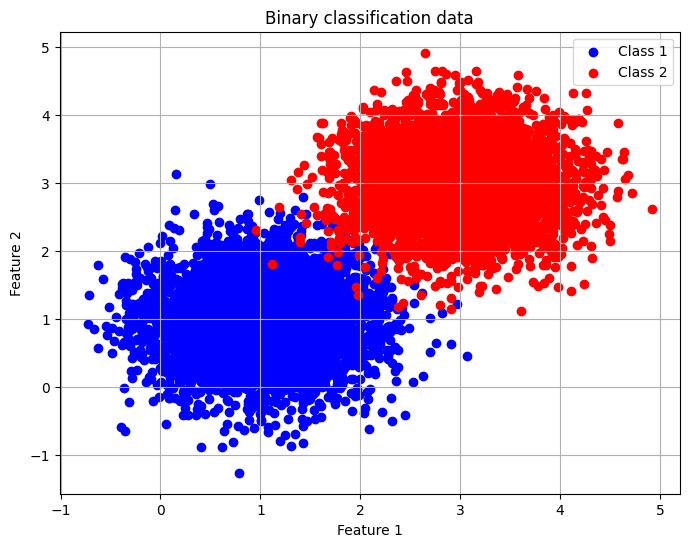

In [ ]:
##################################################
#Generating binary classification data (linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

mean1 = [1,1]
mean2 = [3,3]
cov = [[0.3,0],[0,0.3]]
class1_tr = np.random.multivariate_normal(mean1, cov, size=(4500))
class2_tr = np.random.multivariate_normal(mean2, cov, size=(4500))

tr_data = np.concatenate([class1_tr, class2_tr], axis=0)
tr_targets = np.concatenate([np.zeros(len(class1_tr)), np.ones(len(class2_tr))])

class1_te = np.random.multivariate_normal(mean1, cov, size=(500))
class2_te = np.random.multivariate_normal(mean2, cov, size=(500))

te_data = np.concatenate([class1_te, class2_te], axis=0)
te_targets = np.concatenate([np.zeros(len(class1_te)), np.ones(len(class2_te))])

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_tr[:, 0], class1_tr[:, 1], color='blue', label='Class 1')
plt.scatter(class2_tr[:, 0], class2_tr[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()


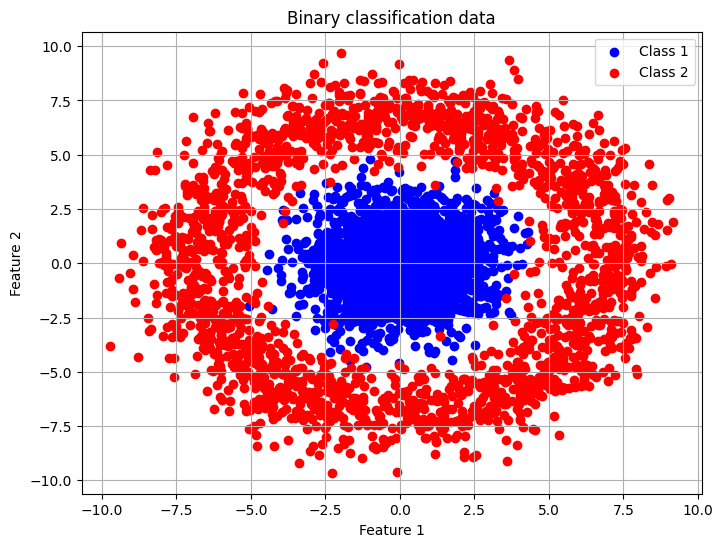

In [ ]:
##################################################
#Generating binary classification data (non-linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

# Function to generate data for concentric circles
def generate_concentric_data(n_samples, radius1,radius2, noise_std):
    # Generate random angles
    angles = np.random.rand(n_samples) * 2 * np.pi
    noise = noise_std*np.random.randn(n_samples)
    # Generate inner and outer circles
    inner_circle = np.array([(radius1 + noise) * np.cos(angles), (radius1 + noise) * np.sin(angles)]).T
    outer_circle = np.array([(radius2 + noise) * np.cos(angles), (radius2 + noise) * np.sin(angles)]).T
    return inner_circle, outer_circle

# Generate data for two classes
n_samples = 2000  # Number of samples for each class
radius1 = 2  # Radius of inner circle
radius2 = 7  # Radius of inner circle
noise_std = 1   # Noise to be added to radius

class1_data, class2_data = generate_concentric_data(n_samples, radius1,radius2,noise_std)

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_data[:, 0], class1_data[:, 1], color='blue', label='Class 1')
plt.scatter(class2_data[:, 0], class2_data[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()



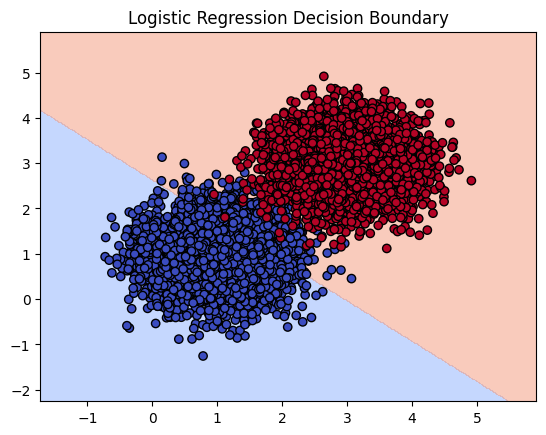

Logistic Regression Accuracy: 0.9210


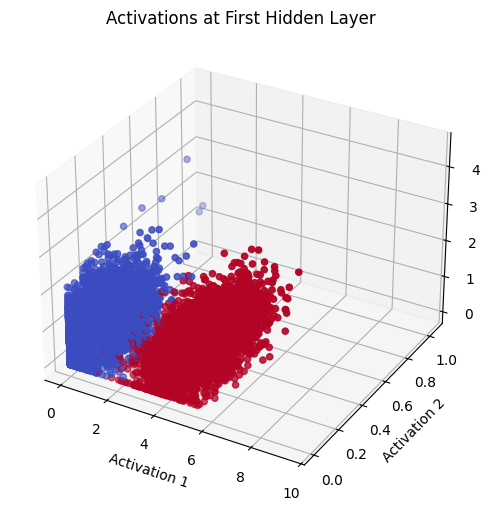

Neural Network Accuracy: 0.9920


In [ ]:
##################################################
#Classify the linearly separable data using linear classification models
##################################################

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def logistic_regression(x_train, y_train, x_test):
    # Add bias term to the input data
    x_train = np.hstack((np.ones((x_train.shape[0], 1)), x_train))
    x_test = np.hstack((np.ones((x_test.shape[0], 1)), x_test))

    # Initialize weights
    weights = np.zeros(x_train.shape[1])

    # Gradient descent parameters
    learning_rate = 0.01
    n_iterations = 1000

    for i in range(n_iterations):
        # Compute predictions
        predictions = sigmoid(x_train @ weights)

        # Compute gradients
        gradients = x_train.T @ (predictions - y_train) / y_train.size

        # Update weights
        weights -= learning_rate * gradients

    # Compute test predictions
    test_predictions = sigmoid(x_test @ weights)
    test_predictions = np.where(test_predictions >= 0.5, 1, 0)

    return test_predictions, weights

def compute_accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def visualize_boundary(x, y, weights):
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    grid = np.c_[np.ones((xx.size, 1)), xx.ravel(), yy.ravel()]
    probs = sigmoid(grid @ weights).reshape(xx.shape)

    plt.contourf(xx, yy, probs > 0.5, alpha=0.5, cmap='coolwarm')
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.title("Logistic Regression Decision Boundary")
    plt.show()


##################################################
#Classify the linearly separable data using deep neural based classification models
##################################################

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# input layer, 2 hidden layers, and output layer
# 3 neurons in both hidden layers, 2 neurons in input layer, and 1 neuron in output layer

def neural_network(x_train, y_train, x_test):
    # Initialize weights and biases
    input_size = x_train.shape[1]
    hidden_size1 = 3
    hidden_size2 = 3
    output_size = 1

    W1 = np.random.randn(input_size, hidden_size1) * np.sqrt(2. / input_size)
    b1 = np.zeros((1, hidden_size1))
    W2 = np.random.randn(hidden_size1, hidden_size2) * np.sqrt(2. / hidden_size1)
    b2 = np.zeros((1, hidden_size2))
    W3 = np.random.randn(hidden_size2, output_size) * np.sqrt(2. / hidden_size2)
    b3 = np.zeros((1, output_size))

    # Gradient descent parameters
    learning_rate = 0.001
    n_iterations = 300
    batch_size = 64
    n_samples = x_train.shape[0]
    n_batches = n_samples // batch_size

    # Training loop for sgd
    for epoch in range(n_iterations):
        # Shuffle the training data
        indices = np.arange(n_samples)
        np.random.shuffle(indices)
        x_train = x_train[indices]
        y_train = y_train[indices]

        # Iterate through the batches of data
        for batch in range(n_batches):
            # Get the batch of data
            start = batch * batch_size
            end = start + batch_size
            x_batch = x_train[start:end]
            y_batch = y_train[start:end]

            # Forward propagation
            a1 = x_batch @ W1 + b1
            z1 = relu(a1)
            a2 = z1 @ W2 + b2
            z2 = relu(a2)
            a3 = z2 @ W3 + b3
            z3 = sigmoid(a3)

            # Compute loss (binary cross-entropy)
            loss = -np.mean((1 - y_batch) * np.log(z3 + 1e-10) + y_batch * np.log(1 - z3 + 1e-10))

            # Backward propagation
            da3 = (z3 - (1 - y_batch.reshape(-1, 1))) / batch_size
            dW3 = z2.T @ da3
            db3 = np.sum(da3, axis=0, keepdims=True)

            da2 = da3 @ W3.T * relu_derivative(a2)
            dW2 = z1.T @ da2
            db2 = np.sum(da2, axis=0, keepdims=True)

            da1 = da2 @ W2.T * relu_derivative(z1)
            dW1 = x_batch.T @ da1
            db1 = np.sum(da1, axis=0, keepdims=True)

            # Update weights and biases using gradient descent
            W1 -= learning_rate * dW1
            b1 -= learning_rate * db1
            W2 -= learning_rate * dW2
            b2 -= learning_rate * db2
            W3 -= learning_rate * dW3
            b3 -= learning_rate * db3

    full_a1 = x_train @ W1 + b1
    full_z1 = relu(full_a1)
    full_a2 = full_z1 @ W2 + b2
    full_z2 = relu(full_a2)

    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(full_z1[:,0], full_z1[:,1], full_z1[:,2], c=y_train, cmap='coolwarm')
    ax.set_xlabel('Activation 1')
    ax.set_ylabel('Activation 2')
    ax.set_zlabel('Activation 3')
    ax.set_title('Activations at First Hidden Layer')
    plt.show()

    # Forward pass on test data
    a1_test = x_test @ W1 + b1
    z1_test = relu(a1_test)
    a2_test = z1_test @ W2 + b2
    z2_test = relu(a2_test)
    a3_test = z2_test @ W3 + b3
    z3_test = sigmoid(a3_test)
    test_predictions = np.where(z3_test >= 0.5, 0, 1).flatten()

    return test_predictions


##################################################
#Compare the performance of both the models on linearly separable data
##################################################

pred_logistic, weights = logistic_regression(tr_data, tr_targets, te_data)
visualize_boundary(tr_data, tr_targets, weights)
accuracy_logistic = compute_accuracy(te_targets, pred_logistic)
print(f"Logistic Regression Accuracy: {accuracy_logistic:.4f}")

pred_nn = neural_network(tr_data, tr_targets, te_data)
accuracy_nn = compute_accuracy(te_targets, pred_nn)
print(f"Neural Network Accuracy: {accuracy_nn:.4f}")






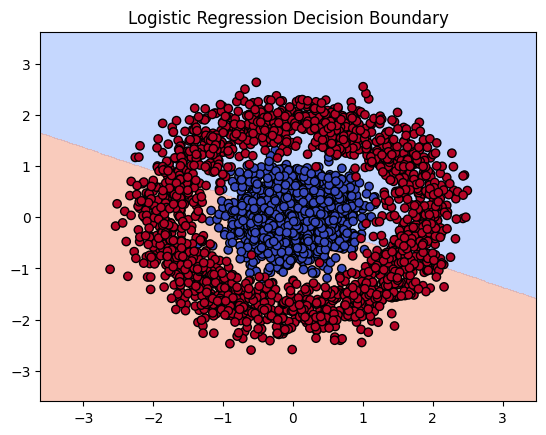

Logistic Regression Accuracy: 0.5150


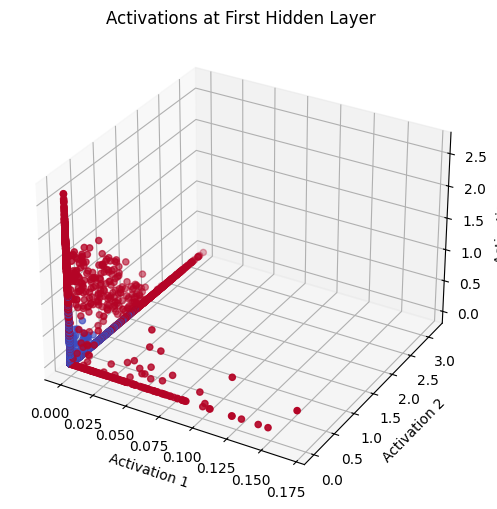

Neural Network Accuracy: 0.8100


In [ ]:
##################################################
#Classify the non-linearly separable data using linear classification models
##################################################

# def sigmoid(x):
#   x_clipped = np.clip(x, -500, 500)  # Prevent exponential overflow
#   return 1 / (1 + np.exp(-x_clipped))





##################################################
#Classify the non-linearly separable data using deep neural based classification models
##################################################

def neural_network(x_train, y_train, x_test):
    # Initialize weights and biases
    input_size = x_train.shape[1]
    hidden_size1 = 3
    hidden_size2 = 3
    output_size = 1

    W1 = np.random.randn(input_size, hidden_size1) * np.sqrt(2. / input_size)
    b1 = np.zeros((1, hidden_size1))
    W2 = np.random.randn(hidden_size1, hidden_size2) * np.sqrt(2. / hidden_size1)
    b2 = np.zeros((1, hidden_size2))
    W3 = np.random.randn(hidden_size2, output_size) * np.sqrt(2. / hidden_size2)
    b3 = np.zeros((1, output_size))

    # Gradient descent parameters
    learning_rate = 0.001
    n_iterations = 300
    batch_size = 64
    n_samples = x_train.shape[0]
    n_batches = n_samples // batch_size

    # Training loop for sgd
    for epoch in range(n_iterations):
        # Shuffle the training data
        indices = np.arange(n_samples)
        np.random.shuffle(indices)
        x_train = x_train[indices]
        y_train = y_train[indices]

        # Iterate through the batches of data
        for batch in range(n_batches):
            # Get the batch of data
            start = batch * batch_size
            end = start + batch_size
            x_batch = x_train[start:end]
            y_batch = y_train[start:end]

            # Forward propagation
            a1 = x_batch @ W1 + b1
            z1 = relu(a1)
            a2 = z1 @ W2 + b2
            z2 = relu(a2)
            a3 = z2 @ W3 + b3
            z3 = sigmoid(a3)

            # Compute loss (binary cross-entropy)
            loss = -np.mean((1 - y_batch) * np.log(z3 + 1e-10) + y_batch * np.log(1 - z3 + 1e-10))

            # Backward propagation
            da3 = (z3 - (1 - y_batch.reshape(-1, 1))) / batch_size
            dW3 = z2.T @ da3
            db3 = np.sum(da3, axis=0, keepdims=True)

            da2 = da3 @ W3.T * relu_derivative(a2)
            dW2 = z1.T @ da2
            db2 = np.sum(da2, axis=0, keepdims=True)

            da1 = da2 @ W2.T * relu_derivative(z1)
            dW1 = x_batch.T @ da1
            db1 = np.sum(da1, axis=0, keepdims=True)

            # Update weights and biases using gradient descent
            W1 -= learning_rate * dW1
            b1 -= learning_rate * db1
            W2 -= learning_rate * dW2
            b2 -= learning_rate * db2
            W3 -= learning_rate * dW3
            b3 -= learning_rate * db3

    full_a1 = x_train @ W1 + b1
    full_z1 = relu(full_a1)
    full_a2 = full_z1 @ W2 + b2
    full_z2 = relu(full_a2)

    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(full_z1[:,0], full_z1[:,1], full_z1[:,2], c=y_train, cmap='coolwarm')
    ax.set_xlabel('Activation 1')
    ax.set_ylabel('Activation 2')
    ax.set_zlabel('Activation 3')
    ax.set_title('Activations at First Hidden Layer')
    plt.show()

    # Forward pass on test data
    a1_test = x_test @ W1 + b1
    z1_test = relu(a1_test)
    a2_test = z1_test @ W2 + b2
    z2_test = relu(a2_test)
    a3_test = z2_test @ W3 + b3
    z3_test = sigmoid(a3_test)
    test_predictions = np.where(z3_test >= 0.5, 0, 1).flatten()

    return test_predictions


##################################################
#Compare the performance of both the models on non-linearly separable data
##################################################
# split class1_data and class2_data as 90% for train and 10% for test
train_size = int(0.9 * len(class1_data))
class1_train = class1_data[:train_size]
class1_test = class1_data[train_size:]
class2_train = class2_data[:train_size]
class2_test = class2_data[train_size:]

train_data = np.concatenate([class1_train, class2_train], axis=0)
train_labels = np.concatenate([np.zeros(len(class1_train)), np.ones(len(class2_train))])
test_data = np.concatenate([class1_test, class2_test], axis=0)
test_labels = np.concatenate([np.zeros(len(class1_test)), np.ones(len(class2_test))])

train_data = (train_data - np.mean(train_data)) / np.std(train_data)
test_data = (test_data - np.mean(test_data)) / np.std(test_data)

pred_logistic, weights = logistic_regression(train_data, train_labels, test_data)
visualize_boundary(train_data, train_labels, weights)
accuracy_logistic = compute_accuracy(test_labels, pred_logistic)
print(f"Logistic Regression Accuracy: {accuracy_logistic:.4f}")

pred_nn = neural_network(train_data, train_labels, test_data)
accuracy_nn = compute_accuracy(test_labels, pred_nn)
print(f"Neural Network Accuracy: {accuracy_nn:.4f}")




<b> Report your observations </b>

1. The Logistic regression model works really well on linearly separable data, as is expected.

2. The Neural Network model works equally well, even better some times, compared to Logistic regression model, on linearly separable data.

3. On non-linearly separable data however, the Logistic regression model does not perform well at all, it gives an accuracy of 50% or less. This can be attributed to the fact that Logistic regression can only produce Linear decision boundaries, which does not work well with non-linearly separable data.

4. The Neural network performs well on non-linearly separable data because it uses multiple layers of neurons with non-linear activation functions, allowing it to learn complex decision boundaries. Each hidden layer transforms the data into new representations that may become linearly separable at the final layer, even though the original data was not.

5. Even though both neural networks and logistic regression may use the sigmoid activation function in the final layer, the neural network's power comes from the composition of multiple non-linear transformations before reaching that final layer.

